# 1. Préparation des Données


## 1.1 Importation des bibliothèques nécessaires

In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuration pour les visualisations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

# Pour une meilleure lisibilité des graphiques
%matplotlib inline

## 1.2 Chargement du fichier Excel

In [3]:
df=pd.read_excel("C:\\Users\\hj\\Downloads\\ab4e5df7-08a5-4e76-8ddd-9d4f845ecff1.xlsx")

## 1.3 Exploration initiale des données

In [4]:
# Affichage des premières lignes du dataset
df.head()

,client's age,marital status,amount of expenses,amount of income,amount requested of loan,price of good,credit status
0,30,2,73,129,800,846,Yes
1,58,3,48,131,1000,1658,Yes
2,46,2,90,200,2000,2985,No
3,24,1,63,182,900,1325,Yes
4,26,1,46,107,310,910,Yes


In [5]:
# Informations sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   client's age              1015 non-null   int64 
 1   marital status            1015 non-null   int64 
 2   amount of expenses        1015 non-null   int64 
 3   amount of income          1015 non-null   int64 
 4   amount requested of loan  1015 non-null   int64 
 5   price of good             1015 non-null   int64 
 6   credit status             1015 non-null   object
dtypes: int64(6), object(1)
memory usage: 55.6+ KB


In [6]:
# Statistiques descriptives
df.describe().T

,count,mean,std,min,25%,50%,75%,max
client's age,1015.0,37.902463,10.967288,18.0,29.0,36.0,46.0,68.0
marital status,1015.0,1.898522,0.589644,1.0,2.0,2.0,2.0,5.0
amount of expenses,1015.0,61.765517,20.779157,35.0,45.0,60.0,75.0,173.0
amount of income,1015.0,150.505419,98.396812,0.0,96.5,133.0,185.0,959.0
amount requested of loan,1015.0,1034.745813,452.833277,100.0,750.0,1000.0,1300.0,3800.0
price of good,1015.0,1439.184236,603.421422,270.0,1127.5,1375.0,1637.5,8800.0


In [7]:
# Vérification des valeurs manquantes
print("Vérification des valeurs manquantes :")
df.isnull().sum()

Vérification des valeurs manquantes :


client's age                0
marital status              0
amount of expenses          0
amount of income            0
amount requested of loan    0
price of good               0
credit status               0
dtype: int64

## 1.4 Renommage des colonnes pour plus de clarté

Pour faciliter la manipulation des données, nous allons renommer les colonnes avec des noms plus courts et sans espaces.

In [8]:
cols = {
    "client's age": "age",
    "marital status": "marital_status",
    "amount of expenses": "expenses",
    "amount of income": "income",
    "amount requested of loan": "loan_amount",
    "price of good": "good_price",
    "credit status": "credit_status"
}


df = df.rename(columns=cols)

print("Colonnes après renommage :")
print(df.columns.tolist())

df.head()

Colonnes après renommage :
['age', 'marital_status', 'expenses', 'income', 'loan_amount', 'good_price', 'credit_status']


,age,marital_status,expenses,income,loan_amount,good_price,credit_status
0,30,2,73,129,800,846,Yes
1,58,3,48,131,1000,1658,Yes
2,46,2,90,200,2000,2985,No
3,24,1,63,182,900,1325,Yes
4,26,1,46,107,310,910,Yes


## 1.5 Transformation de la variable cible

La variable cible `credit_status` est actuellement sous forme de texte ("Yes" ou "No"). Pour faciliter la modélisation, nous allons la transformer en variable binaire (0 ou 1) :
- "Yes" (solvable) → 0
- "No" (non solvable) → 1

Cette convention est choisie pour que la classe positive (1) représente les clients non solvables, ce qui est généralement la classe d'intérêt dans les problèmes de crédit.

In [9]:
# Vérification des valeurs de la variable cible avant renommer
print("Valeurs uniques de credit_status avant transformation :")
print(df['credit_status'].value_counts())

# Transformation de la variable cible
df['credit_status'] = df['credit_status'].map({"Yes": 0, "No": 1})

# Vérification après transformation
print("\nValeurs uniques de credit_status après transformation :")
print(df['credit_status'].value_counts())
print("\n0 = Solvable (Yes), 1 = Non solvable (No)")

Valeurs uniques de credit_status avant transformation :
credit_status
Yes    742
No     273
Name: count, dtype: int64

Valeurs uniques de credit_status après transformation :
credit_status
0    742
1    273
Name: count, dtype: int64

0 = Solvable (Yes), 1 = Non solvable (No)


## 1.6 Vérification de la distribution des variables


C:\Users\hj\AppData\Local\Temp\ipykernel_15264\191754065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='credit_status', data=df, palette='Set2')


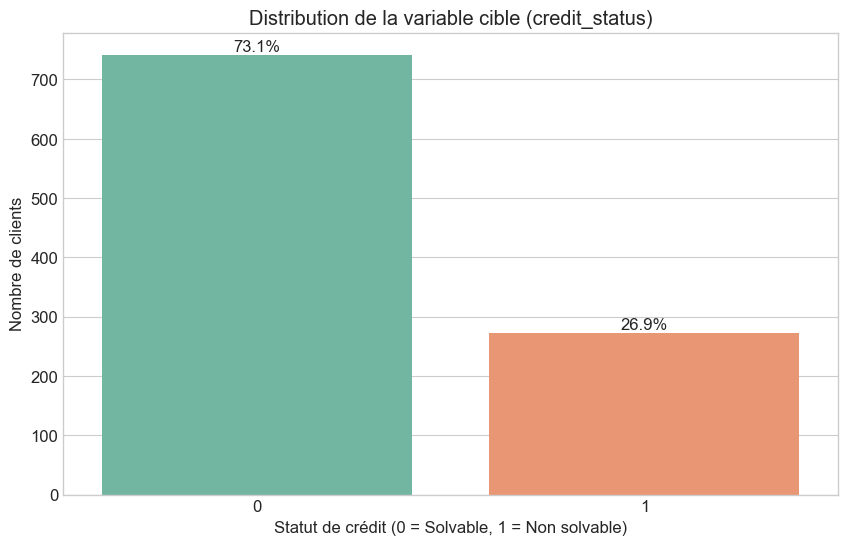

In [11]:
# Distribution de la variable cible
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='credit_status', data=df, palette='Set2')
plt.title('Distribution de la variable cible (credit_status)')
plt.xlabel('Statut de crédit (0 = Solvable, 1 = Non solvable)')
plt.ylabel('Nombre de clients')

total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

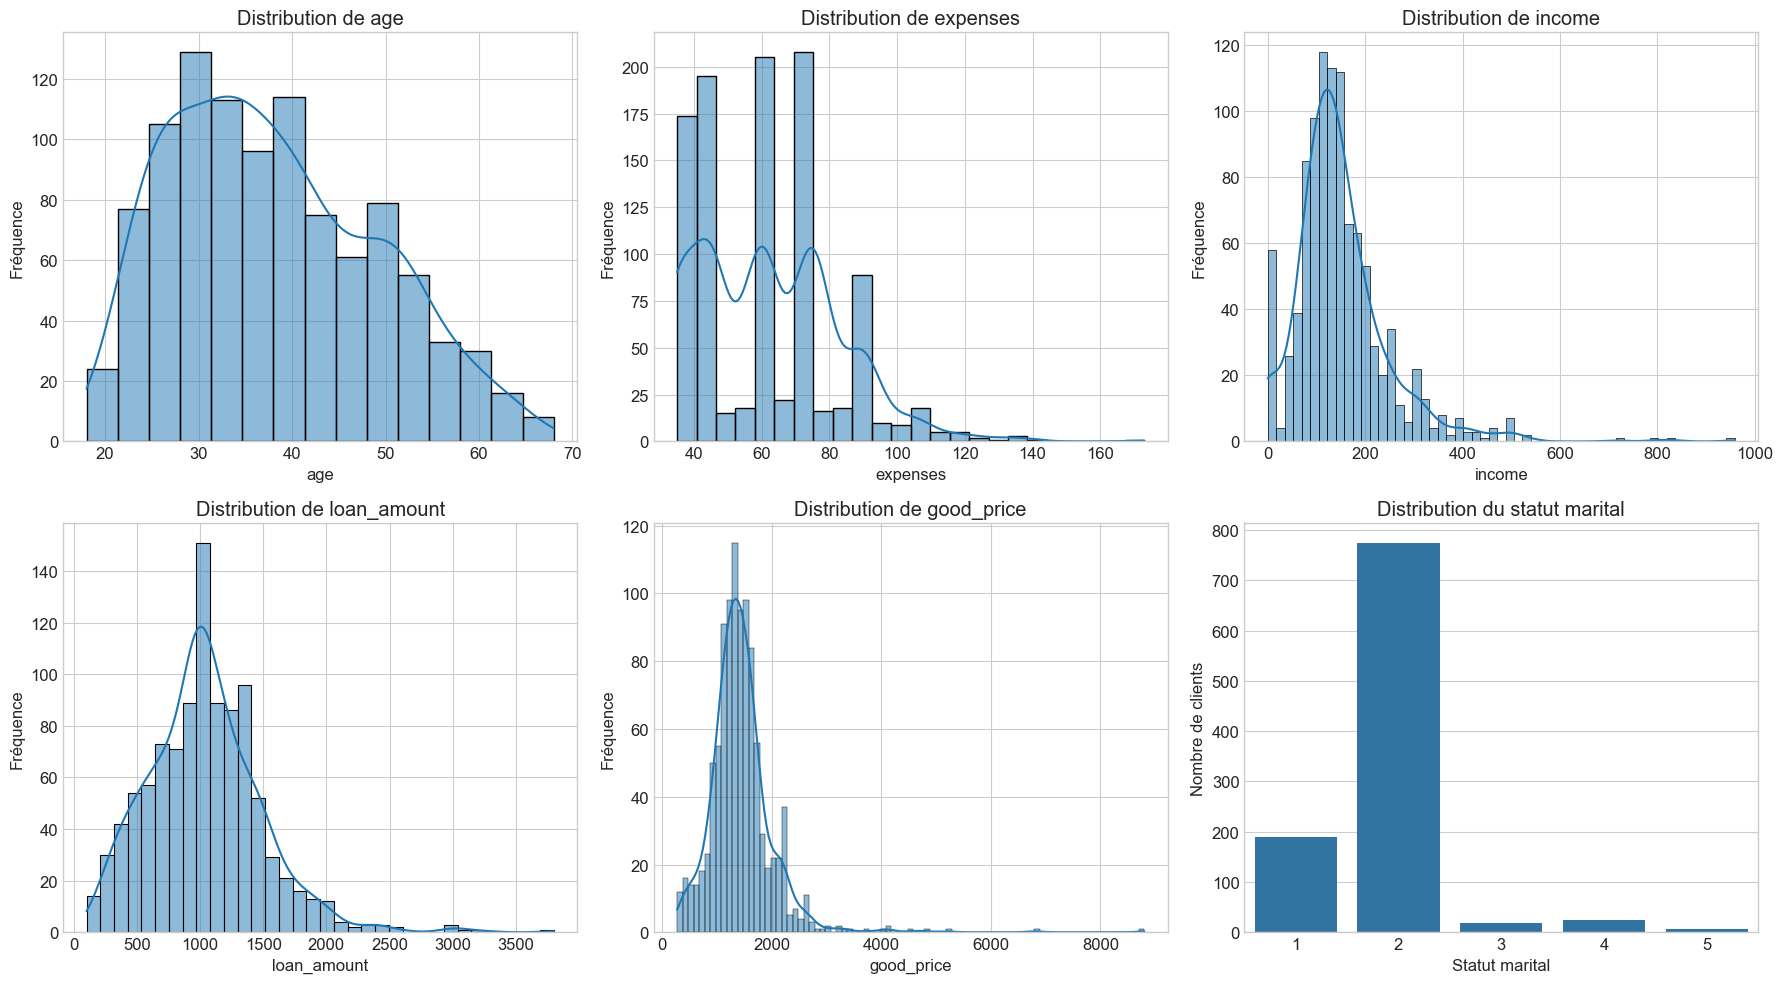

In [ ]:
# Visualisation de la distribution des variables numériques et catégorielles
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()


variables_numeriques = ['age', 'expenses', 'income', 'loan_amount', 'good_price']

for i, var in enumerate(variables_numeriques):
    sns.histplot(df[var], kde=True, ax=axes[i]) # KDE : fonction de densité de probabilité (lissage de l(histogramme))
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Fréquence')

# Distribution du statut marital
sns.countplot(x='marital_status', data=df, ax=axes[5])
axes[5].set_title('Distribution du statut marital')
axes[5].set_xlabel('Statut marital')
axes[5].set_ylabel('Nombre de clients')

plt.tight_layout()
plt.show()

## 1.7 Sauvegarde des données préparées


In [13]:
output_dir = "C:\\Users\\hj\\OneDrive\\Bureau\TP_Class\\Data"

csv_path = os.path.join(output_dir, "credit_data_prepared.csv")
df.to_csv(csv_path, index=False)

# Sauvegarde au format pickle pour préserver les types de données
pickle_path = os.path.join(output_dir, "pickeled_data_prepared.pkl")
df.to_pickle(pickle_path)

print(f"Données préparées sauvegardées avec succès dans le dossier : {output_dir}")
print(f"Nombre total d'observations : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")

Données préparées sauvegardées avec succès dans le dossier : C:\Users\hj\OneDrive\Bureau\TP_Class\Data
Nombre total d'observations : 1015
Nombre de variables : 7


## 1.8 Résumé de la préparation des données

Dans ce notebook, nous avons effectué les opérations suivantes :

1. **Chargement des données** : Nous avons chargé le fichier Excel contenant les données des clients.
2. **Exploration initiale** : Nous avons examiné la structure des données, les statistiques descriptives et vérifié l'absence de valeurs manquantes.
3. **Renommage des colonnes** : Nous avons renommé les colonnes pour faciliter la manipulation des données.
4. **Transformation de la variable cible** : Nous avons transformé la variable `credit_status` en variable binaire (0 = Solvable, 1 = Non solvable).
5. **Vérification des distributions** : Nous avons vérifié la distribution de chaque variable pour détecter d'éventuelles anomalies.
6. **Sauvegarde des données préparées** : Nous avons sauvegardé les données préparées dans différents formats pour les utiliser dans les notebooks suivants.

Les données sont maintenant prêtes pour l'analyse exploratoire qui sera réalisée dans le prochain notebook.